# Préambule
Avant toute chose, veuillez renommer ce notebook en mettant vos Prénoms, Noms et numéro de groupe (à la place de la lettre X). Par exemple, pour Jérémy Dupont du groupe A, ça donne 3MIC_A_DUPONT_JEREMY

Tous les exercices sont indépendants, vous devez respecter impérativement les noms des fonctions et des variables, le nombre de variable qu'elles prennent en entrée et en sortie. Vos codes doivent être efficaces et simples. 
Il existe des fonctions python qui répondent exactement aux exercices (il existe une LU, des algorithmes d'optimisation, etc...) Il va de soi que nous n'évaluons par votre capacité à renommer une fonction python existante mais bien à programmer par vous même. Cependant, certaines fonctions comme `linspace` ou `solve` sont autorisées si on ne vous demande pas explicitement de les reprogrammer. 
<div style="background-color:rgba(255, 0, 0, 0.1); padding:15px;">
 Lorsque des réponses doivent être faites dans le texte, elles doivent apparaître dans une balise 'div' coloriée en rouge.
</div>

In [185]:
# METTEZ TOUS VOS IMPORTS ICI
import numpy as np
import matplotlib.pyplot as plt

# Exercice I : Autour de la fonction arctangente :
La fonction arctangente est donnée par `np.arctan()`.

Soit $f:x\in \mathbb{R}\rightarrow \arctan(x)+1$. On cherche à approximer 
$$I=\int_0^1 f(x)dx$$
On nous donne le vrai résultat de $I$ qui est
$I=\frac \pi 4 +1 -\frac{\ln(2)}{2}$

On se donne $(x_i)_{i=0,\dots n}$, qui sont $n+1$ points différents qui vérifient
$$0=x_0<x_1<\dots<x_{n}=1 \quad (1)$$
supposera que $[0,1[$ est partitionné en $n$ intervalles de la forme $[x_i,x_{i+1}[$ avec $i=0,\dots n-1$.

### Question I-1 : Création des points
On se donne ci-dessous donne une fonction `alea(n)` qui calcule `n+1` points qui vérifient $(1)$. Comment sont choisis ces points ?

<div style="background-color:rgba(255, 0, 0, 0.1); padding:15px;">
Choisir n+1 point selons la loi uniforme (semble uniforme mais on ne sais pas exacte) entre 0 et 1 avec des points à deux bordres sont 0 et 1 
</div>

In [186]:
def alea(n) :
    x = np.zeros(n+1)
    x[1:n]=np.sort(np.random.uniform(0,1,size=n-1))
    x[-1]=1
    return x
print(alea(5))

[0.         0.11442121 0.4668126  0.77636402 0.78043184 1.        ]


### Question I-2 : Méthode des Trapèzes
Implémentez une fonction `Trapeze(x)` qui calcule l'approximation de $I$ par méthode des trapèzes si les points sont donnés par `x`. Pour vérifier vos calculs, vous comparerez avec la vraie valeur `I_vraie` donnée par $=\frac \pi 4 +1 -\frac{\ln(2)}{2}$.

In [187]:
def f(t):
    return np.arctan(t)+1

In [188]:
def Trapeze(x) :
    fx = f(x)
    return sum(fx[1:]+fx[:-1])/(2*(len(x)-1))

In [189]:
np.random.seed(42)
x = alea(100)
I_approx = Trapeze(x)
I_vraie = np.pi/4 + 1 - np.log(2)/2
print(I_approx,I_vraie)

1.4165608634547224 1.4388245731174756


### Question I-3 : Calcul de l'erreur
Implémentez une fonction `Err_alea()` qui rend `n` et `err` deux tableaux de taille `8`.
Pour tout $i=0,\dots,7$  `err[i]` est l'erreur relative entre `I_vraie` et le résultat de `Trapeze(x)` où `x` est donné par `alea(n)` avec $n=10^{i}$.

In [190]:
def Err_alea() :
    n = np.zeros(8)
    err = np.zeros(8)
    for i in range(8):
        n[i] = 10**i
        x = alea(10**i)
        I_approx = Trapeze(x)
        err[i] = abs(I_approx - I_vraie)/I_vraie
    return n,err

Implémentez maintenant une fonction `Err_equi()` qui rend `n` et `err` deux tableaux de taille `8`. 
Pour tout $i=0,\dots,7$  `err[i]` est l'erreur relative entre `I_vraie` et le résultat de `Trapeze(x)` où `x` est donné par un découpage uniforme de $[0,1]$ par $n$ intervalles avec $n=10^{i}$.

In [191]:
def Err_equi() :
    n = np.zeros(8)
    err = np.zeros(8)
    for i in range(8):
        n[i] = 10**i
        x = np.linspace(0,1,10**i+1)
        I_approx = Trapeze(x)
        err[i] = abs(I_approx - I_vraie)/I_vraie
    return n,err

### Question I-4 : Analyse des résultats

Comparez sur un même graphique les erreurs données par `Err_equi()` et `Err_alea()`. Vous devrez mettre des échelles `log` là où cela est pertinent et mettre une légende. 

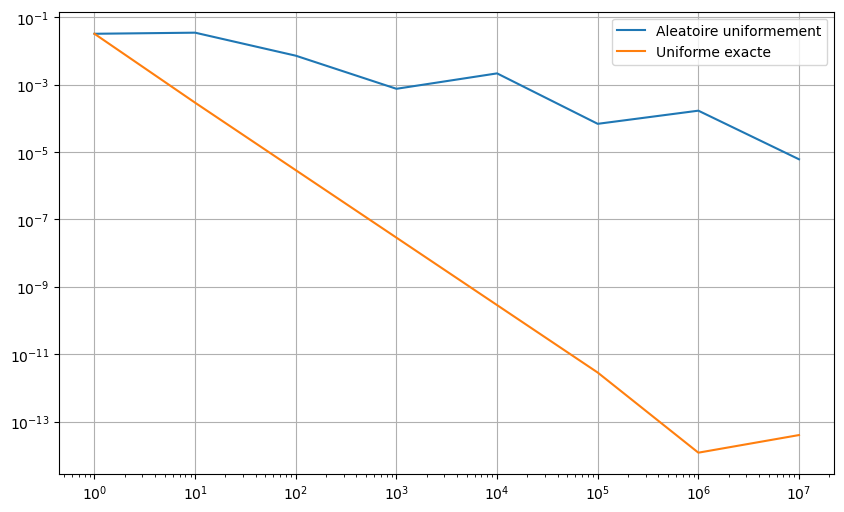

In [192]:
plt.figure('Analyser l\'erreur entre deux methodes découpages',figsize = (10,6))
result_alea = Err_alea()
result_equi = Err_equi()
plt.loglog(result_alea[0],result_alea[1],label = 'Aleatoire uniformement')
plt.loglog(result_equi[0],result_equi[1],label = 'Uniforme exacte')
plt.legend()
plt.grid()
plt.show()

Est-ce que les méthodes sont du même ordre ? Est-ce que une des deux méthode est meilleure que l'autre ? Quel est l'ordre de la méthode uniforme ?
<div style="background-color:rgba(255, 0, 0, 0.1); padding:15px;">
    AVec la méthode aleatoire, il semble de converge mais avec très lentement vitesse quand la méthode uniforme converge avec vitesse plus grand (d'ordre 2). 
</div>

# Exercice II : Autour de la fonction arctangente (encore)

### Question II-1 : Question facile
Soit $f$ la fonction $f(x)=\arctan(x)+1$. On cherche à résoudre l'équation $f(x)=x$. On sait qu'il existe une seule et unique solution dans $[1,3]$. 
Implémentez :
1. Une fonction `f(x)` qui rend  $\arctan(x)+1$.
2. Une fonction `df(x)` qui rend  la dérivée de $x\mapsto \arctan(x)+1$.

In [193]:
def f(x) :
    return np.arctan(x)+1
def df(x) :
    return 1/(1+x**2)
print(f(1.32),df(1.32)) # 1.9224643377076358 0.3646441073512252

1.9224643377076358 0.3646441073512252


### Question II-2 : Méthode de point fixe
Implémentez une méthode de point fixe pour résoudre $f(x)=x$. On appelle `pt_fixe(n)` cette fonction, elle doit rendre dans un tableau de taille `n+1` toutes les résultats des `n` itérations de l'algorithme de point fixe. Vous partirez du point initial $x_0=2$.

In [194]:
def pt_fixe(n) :
    result = np.zeros(n+1)
    result[0] = 2
    for i in range(n):
        result[i+1] = f(result[i])
    return result

print(pt_fixe(3)) # [2.         2.10714872 2.12769485 2.13144182]

[2.         2.10714872 2.12769485 2.13144182]


### Question II-3 : Méthode de Newton.
Implémentez une méthode de Newton pour résoudre $f(x)=x$. On appelle `newton(n)` cette fonction, elle doit rendre dans un tableau de taille `n+1` toutes les résultats des `n` itérations de l'algorithme de Newton. Vous partirez du point initial $x_0=2$.

Faites attention, vous connaissez la méthode de Newton pour résoudre une équation de type $F(x)=0$. Il faut donc définir $F(x)=x-f(x)$ dans notre cas.

In [195]:
def newton(n) :
    result = np.zeros(n+1)
    result[0] = 2
    for i in range(n):
        result[i+1] = result[i] - (result[i]-f(result[i]))/(1-df(result[i]))
    return result

print(newton(3)) # [2.         2.1339359  2.13226796 2.13226773]

[2.         2.1339359  2.13226796 2.13226773]


### Question II-4 : Analyse des résultats.
Pour `n=30`, affichez l'évolution de $|f(x)-x|$ au cours des itérations pour la méthode du point fixe et pour la méthode de Newton. Discutez des résultats (ordre des méthodes, quelle méthode est la plus rapide ?)
<div style="background-color:rgba(255, 0, 0, 0.1); padding:15px;">
La méthode de Newton converge très vite (ordre 2) avec la vitesse augmente chaque itération quand la méthode de point fixe converge plus lentement mais uniformement (ordre 1)
</div>

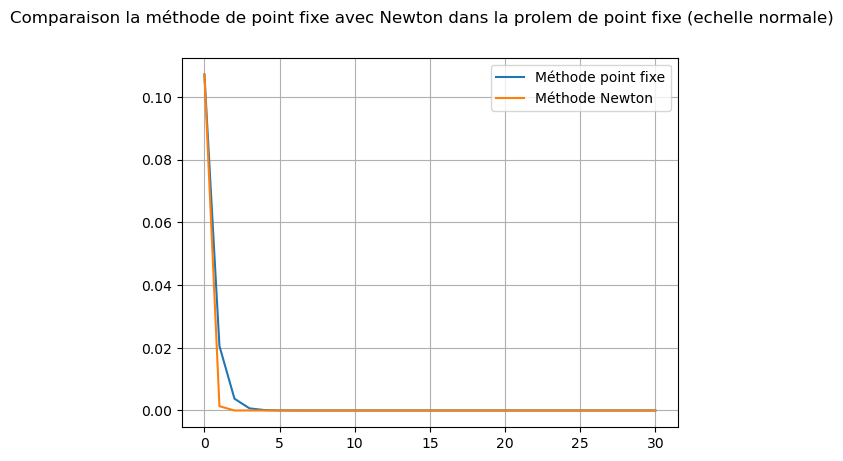

In [196]:
plt.figure('Comparaison la méthode de point fixe avec Newton dans la prolem de point fixe (echelle normale)')
plt.suptitle('Comparaison la méthode de point fixe avec Newton dans la prolem de point fixe (echelle normale)')
abscisse = range(31)
result_fixe = pt_fixe(30)
result_newton = newton(30)
err_fixe = abs(f(result_fixe)-result_fixe)
err_newton = abs(f(result_newton)-result_newton)
plt.plot(abscisse,err_fixe,label ='Méthode point fixe')
plt.plot(abscisse,err_newton,label ='Méthode Newton')
plt.legend()
plt.grid()
plt.show()

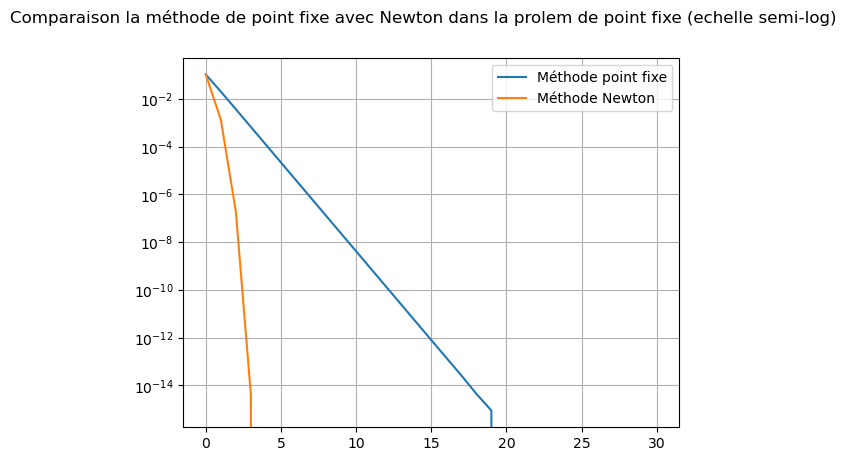

In [197]:
plt.figure('Comparaison la méthode de point fixe avec Newton dans la prolem de point fixe (echelle semi-log)')
plt.suptitle('Comparaison la méthode de point fixe avec Newton dans la prolem de point fixe (echelle semi-log)')
err_fixe = abs(f(result_fixe)-result_fixe)
err_newton = abs(f(result_newton)-result_newton)
plt.semilogy(abscisse,err_fixe,label ='Méthode point fixe')
plt.semilogy(abscisse,err_newton,label ='Méthode Newton')
plt.legend()
plt.grid()
plt.show()

# Exercice III : Optimisation

On cherche à minimiser la fonction $f(x,y)=x^2(2+y)^5+y^{2024}$ par la méthode de Newton. On sait que cette fonction a un unique minimiseur local en $(0,0)$.

### Question III-1 : Question presque facile

Implémentez une fonction `def oracle(M)` qui rend `f,df,Hf` qui représentent respectivement la valeur de la fonction $f$ au point $M$, le gradient de $f$ au point $M$ et la Hessienne de $f$ au point $M$. Le gradient et la Hessienne seront des tableaux.

In [198]:
def oracle(M) :
    x,y = M
    f=x**2*(2+y)**5 + y**2024
    df=np.array([2*x*(2+y)**5,5*x**2*(2+y)**4+2024*y**2023])
    Hf=np.array([[2*(2+y)**5,10*x*(2+y)**4],
                [10*x*(2+y)**4,20*x**2*(2+y)**3+2024*2023*y**2022]])
    return f,df,Hf
    
f,df,Hf=oracle((0.7,0.99))
print('f :',f) #f : 117.09868597491534
print('df : ',df.shape,df) # df :  (2,) [334.56767421 195.81720362]
print('Hf : ',Hf.shape,Hf) #Hf :  (2, 2) [[477.9538203  559.47771607]
 #                                        [559.47771607 261.96892764]]
    

f : 117.09868597491534
df :  (2,) [334.56767421 195.81720362]
Hf :  (2, 2) [[477.9538203  559.47771607]
 [559.47771607 261.96892764]]


### Question III-2 : Algorithme de Newton
Implémentez une fonction `Newton(n)` qui calcule `n` itérations de la méthode de minimisation de Newton. Cette fonction rend `x` et `cf` où `x` est la dernière estimation du minimiseur calculée et `cf` est un tableau qui contient toutes les valeurs de `f(x)` au cours des itérations. En comptant la première itération, `cf` est donc un tableau de taille `n+1`. On commencera au point $x_0=(\frac 1 2,1)$

(array([3.22309781e-07, 9.99036306e-01]), array([61.75      ,  0.38650173,  0.14206697]))


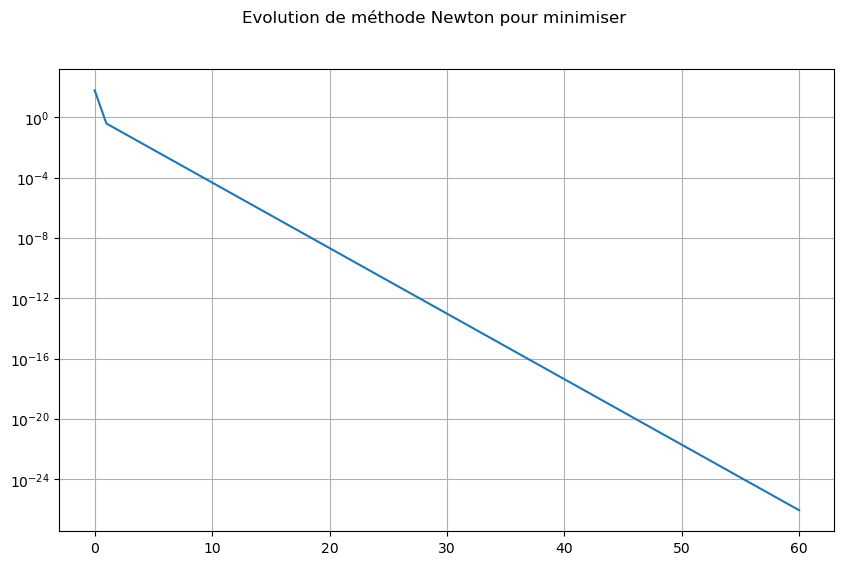

In [199]:
def Newton(n) :
    cf = np.zeros(n+1)
    x = np.array([0.5,1])
    f,df,Hf = oracle(x)
    cf[0] = f
    for i in range(n):
        x = x - np.linalg.inv(Hf)@df
        f,df,Hf = oracle(x)
        cf[i+1] = f
    return x,cf
print(Newton(2)) # (array([3.22309781e-07, 9.99036306e-01]), array([61.75      ,  0.38650173,  0.14206697]))
abcisse = range(61)
_,result = Newton(60)
plt.figure('Evolution de méthode Newton pour minimiser',figsize = (10,6))
plt.suptitle('Evolution de méthode Newton pour minimiser')
plt.semilogy(abcisse,result)
plt.grid()
plt.show()

Tracez l'évolution de $f(x)$ en échelle semi-log pour `n=60` itérations. Commentez sur la vitesse de convergence de la méthode de Newton.

<div style="background-color:rgba(255, 0, 0, 0.1); padding:15px;">
Coverge avec vitesse uniforme (ordre 1)
</div>

### Question III-3 : Algorithme de Gradient à recherche linéaire partielle
L'objectif est de tester l'algorithme de Gradient à recherche linéaire partielle. On se donne un tableau de multiplicateurs $M=[1/10,1/5,1/2,1,2.01,5.01,10.]$.
A chaque itération on itère $$x_{k+1}=x_k-s_{k+1}\nabla f(x_k)$$
Le choix de $s_{k+1}$ se fait selon la règle suivante :
1. Pour tout $m \in M$ on calcule $x_m=x_k-ms_k\nabla f(x_k)$ puis on calcule $f(x_m)$
2. On choisit le $m^\star$ qui minimise $f(x_m)$ parmi tous les $m\in M$.
3. On choisit $s_{k+1}=m^\star s_k$ et donc $x_{k+1}=x_{m^\star}$.

On rappelle les fonctions pour trouver le coefficient le plus petit dans un tableau et son indice correspondant dans les lignes de code suivantes.


In [200]:
import numpy as np
t=np.array([0,4,3.5,-7,3.4])
i=np.argmin(t)
print('i=',i,' et t[i]=', t[i])

i= 3  et t[i]= -7.0


Implémentez une fonction `Partial_LS(n)` qui calcule `n` itérations de la méthode de minimisation de Gradient à recherche linéaire partielle. Comme pour Newton, cette fonction rend `x` et `cf` où `x` est la dernière estimation du minimiseur calculée et `cf` est un tableau qui contient toutes les valeurs de `f(x)` au cours des itérations. En comptant la première itération, `cf` est donc un tableau de taille `n+1`. On commencera au point $x_0=(\frac 1 2,1)$ et avec $s_0=10^{-4}$

In [201]:
M=np.array([0.1,1/5,0.5,1,2.01,5.01,10])
def Partial_LS(n):
    cf = np.zeros(n+1)
    x = np.array([0.5,1])
    f,df,Hf = oracle(x)
    cf[0] = f
    s = 1e-4
    for i in range(n):
        xm = [(x - m*s*df) for m in M]
        fxm = [oracle(x)[0] for x in xm]
        ind = np.argmin(fxm)
        s = M[ind]*s
        x = xm[ind]
        f,df,Hf = oracle(x)
        cf[i+1] = f
    return x,cf
print(Partial_LS(2)) # (array([ 0.27537491, -0.11502267]), array([61.75      ,  3.88381959,  1.80459349]))

(array([ 0.27537491, -0.11502267]), array([61.75      ,  3.88381959,  1.80459349]))


Tracez l'évolution de $f(x)$ en échelle semi-log pour `n=60` itérations.

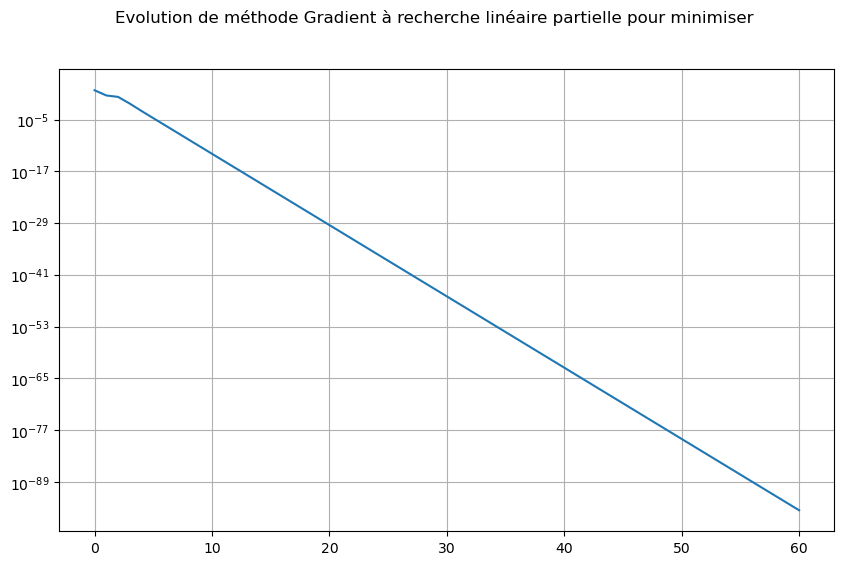

In [202]:
abcisse = range(61)
_,result = Partial_LS(60)
plt.figure('Evolution de méthode Gradient à recherche linéaire partielle pour minimiser',figsize = (10,6))
plt.suptitle('Evolution de méthode Gradient à recherche linéaire partielle pour minimiser')
plt.semilogy(abcisse,result)
plt.grid()
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1); padding:15px;">
Il converge avec ordre 1 aussi mais la vitesse est très grande. Pour la méthode Newton et linéaire recherche, c'est tous $e_{k+1} \leq ce_k$ mais la coefficient $c$ de la méthode linéaire recherche est significativement plus petite que la méthode Newton
</div>